In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X=np.load("X.npy")
Y=np.load("Y.npy")

In [8]:
X
X.shape

(100, 2)

In [9]:
Y #0-cat 1-dog
Y.shape

(100,)

In [5]:
X[:5]

array([[11.563957  ,  1.3389402 ],
       [10.06721983,  4.08616331],
       [ 8.77253877,  2.33030515],
       [10.12748869,  5.32277484],
       [ 9.06439343,  1.74115688]])

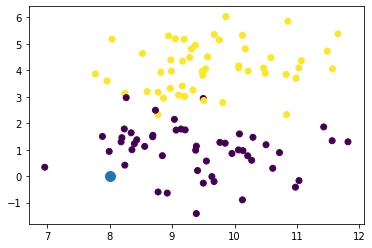

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(8,0,s=100)
plt.show()

In [20]:
def dist(v1,v2):#point can be n dimension
    return np.sqrt(np.sum((v1-v2)**2))

In [12]:
dist(np.array([0,5]),np.array([0,0]))

5.0

In [15]:
def knn(X,Y,query_point,k=5):
    m=X.shape[0]
    distances=[]
    for i in range(m):
        distances.append((dist(query_point,X[i]),Y[i]))
        
    distances=sorted(distances)[:5]
    distances=np.array(distances)
    labels=distances[:,1]
    labels,freq=np.unique(labels,return_counts=True)
    pred=labels[freq.argmax()]
    
    return pred

In [50]:
knn(X,Y,np.array([8,0]))

0.0

In [4]:
import pandas as pd


In [5]:
Train=pd.read_csv("train.csv").values
Test=pd.read_csv("test.csv").values

In [60]:
Train.shape

(19999, 785)

In [6]:
Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 6],
       ...,
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 6],
       [0, 0, 0, ..., 0, 0, 9]], dtype=int64)

In [9]:
X_train=Train[:,:-1]
Y_train=Train[:,-1]

X_test=Test[:,:-1]
Y_test=Test[:,-1]
def visualize(img):
    plt.imshow(img.reshape(28,28),cmap="gray")
    plt.show()

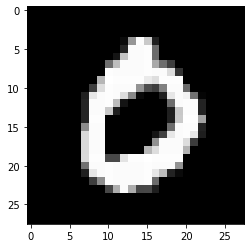

In [73]:
visualize(X_test[2])

In [74]:
knn(X_train,Y_train,X_test[2])

0.0

In [21]:
def accuracy(X_train,Y_train,X_test,Y_test):
    x=0
    for i in range(10):
        n=np.random.randint(0,9999)
        m=knn(X_train,Y_train,X_test[n])
        if m==Y_test[n]: 
            x=x+1
    return x*10.0

In [22]:
accuracy(X_train,Y_train,X_test,Y_test)

100.0